In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Breast_cancer_data.csv')

In [3]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [5]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


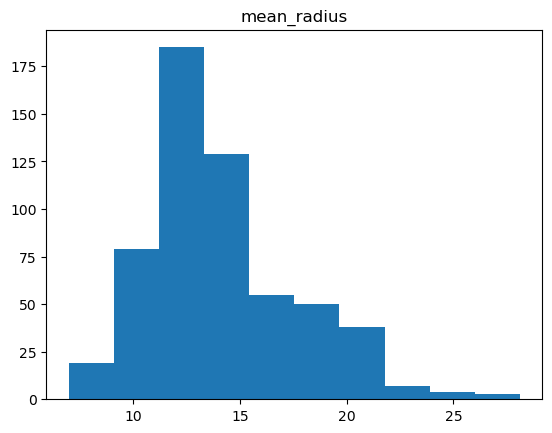

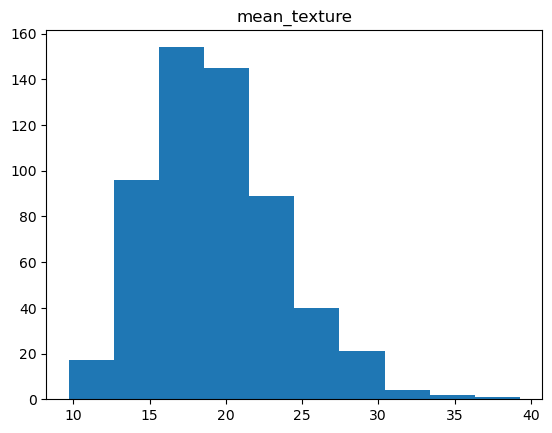

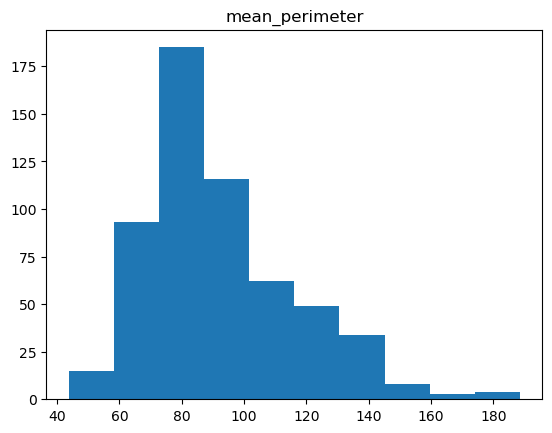

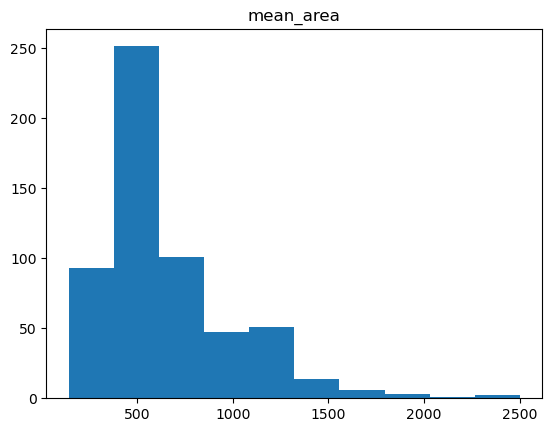

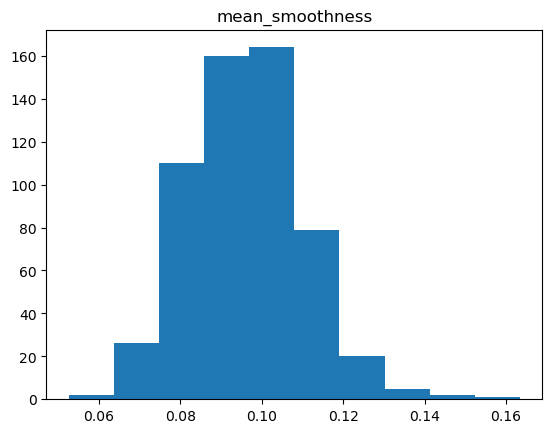

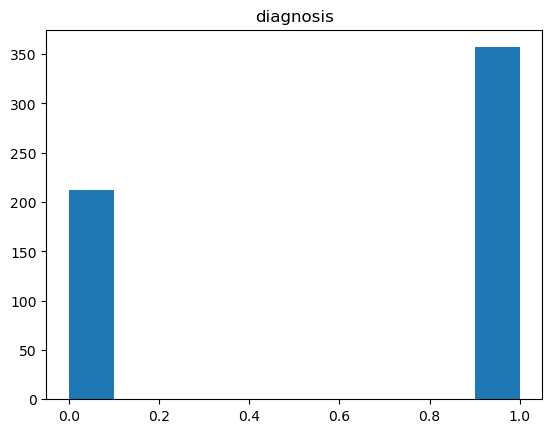

In [6]:
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

                 mean_radius  mean_texture  mean_perimeter  mean_area  \
mean_radius         1.000000      0.323782        0.997855   0.987357   
mean_texture        0.323782      1.000000        0.329533   0.321086   
mean_perimeter      0.997855      0.329533        1.000000   0.986507   
mean_area           0.987357      0.321086        0.986507   1.000000   
mean_smoothness     0.170581     -0.023389        0.207278   0.177028   
diagnosis          -0.730029     -0.415185       -0.742636  -0.708984   

                 mean_smoothness  diagnosis  
mean_radius             0.170581  -0.730029  
mean_texture           -0.023389  -0.415185  
mean_perimeter          0.207278  -0.742636  
mean_area               0.177028  -0.708984  
mean_smoothness         1.000000  -0.358560  
diagnosis              -0.358560   1.000000  


<Axes: >

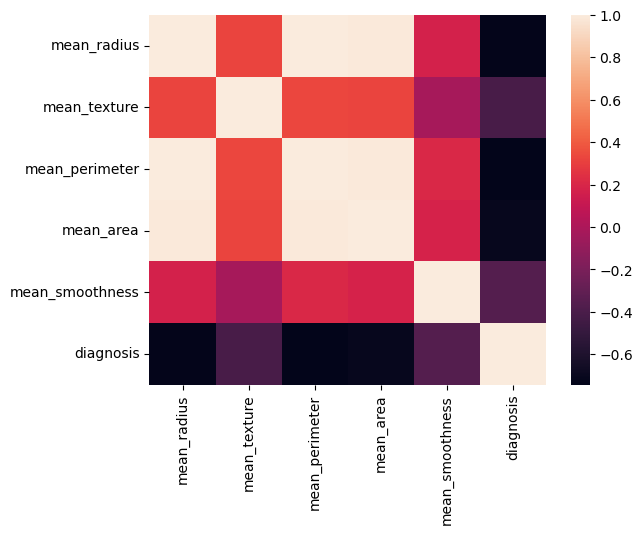

In [7]:
print(df.corr())
sns.heatmap(df.corr())

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score

In [9]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [10]:
x_train,x_val,y_train,y_val=train_test_split(x,y,random_state=0,test_size=0.2)

In [11]:
model1 = KNeighborsClassifier()

In [12]:
model1.fit(x_train,y_train)

KNeighborsClassifier()

In [13]:
predict1 = model1.predict(x_val)

In [14]:
accuracy_score(y_val,predict1)

0.9122807017543859

In [15]:
model2 = RandomForestClassifier().fit(x_train,y_train)

In [16]:
predict2 = model2.predict(x_val)

In [17]:
accuracy_score(y_val,predict2)

0.9298245614035088

In [18]:
model3 = DecisionTreeClassifier().fit(x_train,y_train)

In [19]:
predict3 = model3.predict(x_val)

In [20]:
accuracy_score(y_val,predict3)

0.8859649122807017

In [21]:
model4 = SVC().fit(x_train,y_train)

In [22]:
predict4 = model4.predict(x_val)

In [23]:
accuracy_score(y_val,predict4)

0.8771929824561403

In [24]:
from tensorflow import keras
from tensorflow.keras import layers,callbacks

In [25]:
early_stopping = callbacks.EarlyStopping(min_delta=0.001,patience=20,restore_best_weights=True)

In [26]:
model = keras.Sequential([layers.Dense(512,activation='relu',input_shape=[5]),
                          layers.BatchNormalization(),
                          layers.Dense(512,activation='relu'),
                          layers.BatchNormalization(),
                          layers.Dense(units=1,activation='sigmoid'),])

In [27]:
model.compile(optimizer='adam',loss='mae')

In [28]:
history = model.fit(x_train,y_train,
                    validation_data=(x_val,y_val),
                    batch_size=256,
                    epochs=50,
                    callbacks=[early_stopping],)

Epoch 1/50

2/2 [==============================] - 2s 366ms/step - loss: 0.4270 - val_loss: 0.5877
Epoch 2/50
2/2 [==============================] - 0s 44ms/step - loss: 0.1388 - val_loss: 0.5877
Epoch 3/50
2/2 [==============================] - 0s 45ms/step - loss: 0.1233 - val_loss: 0.5877
Epoch 4/50
2/2 [==============================] - 0s 46ms/step - loss: 0.1275 - val_loss: 0.5877
Epoch 5/50
2/2 [==============================] - 0s 45ms/step - loss: 0.1145 - val_loss: 0.5877
Epoch 6/50
2/2 [==============================] - 0s 45ms/step - loss: 0.1141 - val_loss: 0.5877
Epoch 7/50
2/2 [==============================] - 0s 46ms/step - loss: 0.1081 - val_loss: 0.5877
Epoch 8/50
2/2 [==============================] - 0s 42ms/step - loss: 0.1011 - val_loss: 0.5877
Epoch 9/50
2/2 [==============================] - 0s 43ms/step - loss: 0.1045 - val_loss: 0.5877
Epoch 10/50
2/2 [==============================] - 0s 44ms/step - loss: 0.1022 - val_loss: 0.5877
Epoch 11/50
2/2 [==========

In [29]:
pred = model.predict(x_val)

4/4 [==============================] - 0s 2ms/step


In [30]:
pred

array([[2.8960360e-03],
       [9.4637359e-03],
       [3.0532763e-03],
       [8.4938441e-04],
       [3.1958289e-02],
       [4.9271822e-01],
       [1.6335368e-01],
       [4.8691228e-01],
       [9.9683112e-01],
       [6.7756891e-01],
       [2.1898829e-04],
       [9.4826872e-05],
       [9.4041204e-01],
       [2.5554289e-07],
       [3.4655299e-04],
       [4.4767821e-05],
       [8.1872553e-01],
       [4.1207028e-14],
       [6.7640941e-12],
       [1.5915963e-14],
       [2.0672794e-01],
       [7.5584160e-07],
       [1.5282104e-02],
       [3.9220124e-01],
       [4.1568416e-14],
       [5.8464450e-01],
       [7.4565077e-01],
       [4.2042171e-04],
       [1.3548645e-02],
       [1.5830165e-10],
       [1.3398658e-01],
       [3.0135014e-13],
       [7.6192310e-03],
       [8.4938443e-07],
       [8.6570191e-01],
       [2.6821963e-02],
       [1.8224774e-02],
       [9.0853679e-11],
       [2.4283708e-04],
       [1.4061055e-05],
       [1.2217225e-05],
       [9.249582

ROC_AUC Score :  0.9650682756430613
Function for ROC_AUC Score :  0.9650682756430613
Threshold value is: 7.1679315e-05


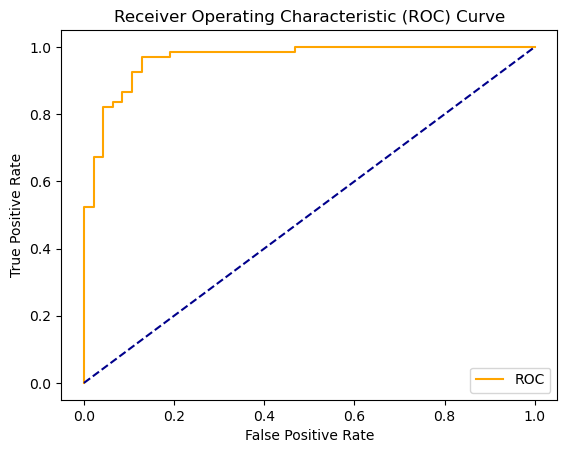

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_val, pred)
roc_auc = auc(fpr, tpr)
print("ROC_AUC Score : ",roc_auc)
print("Function for ROC_AUC Score : ",roc_auc_score(y_val, pred))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [32]:
prediction_classes = [1 if prob > optimal_threshold else 0 for prob in np.ravel(pred)]

In [33]:
accuracy_score(y_val,prediction_classes)

0.9210526315789473

In [34]:
prediction_classes

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0]